# openPMD beamphysics examples

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Nicer plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,8)

# Basic Usage

In [186]:
import numpy as np
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.statistics import slice_statistics

In [153]:
P_beg = ParticleGroup('/Users/mpe/code/lcls2he-lattice/bmad/models/sc_LEIT_mw/new_distribution_all.h5')
P_1_1 = ParticleGroup('/Users/mpe/code/lcls2he-lattice/bmad/models/sc_LEIT_mw/beam_1dcsr_fft3dsc.h5')
P_0_1 = ParticleGroup('/Users/mpe/code/lcls2he-lattice/bmad/models/sc_LEIT_mw/beam_nocsr_fft3dsc.h5')
P_1_0 = ParticleGroup('/Users/mpe/code/lcls2he-lattice/bmad/models/sc_LEIT_mw/beam_1dcsr_nosc.h5')
P_0_0 = ParticleGroup('/Users/mpe/code/lcls2he-lattice/bmad/models/sc_LEIT_mw/beam_nocsr_nosc.h5')
P_rw_SS = ParticleGroup('/Users/mpe/code/lcls2he-lattice/bmad/models/sc_LEIT_mw/beam_rw_SS.h5')
P_rw_Cu = ParticleGroup('/Users/mpe/code/lcls2he-lattice/bmad/models/sc_LEIT_mw/beam_rw_Cu.h5')

In [4]:
Pscram = P.resample(len(P))

NameError: name 'P' is not defined

In [78]:
P_rw_SS.energy
len(P_rw_SS)

100000

In [ ]:
P['mean_energy'], P.units('mean_energy')

In [154]:
P_beg = P_beg.where(P_beg.x > -0.001)
P_1_1 = P_1_1.where(P_1_1.x > -0.001)
P_0_1 = P_0_1.where(P_0_1.x > -0.001)
P_1_0 = P_1_0.where(P_1_0.x > -0.001)
P_0_0 = P_0_0.where(P_0_0.x > -0.001)
P_rw_SS = P_rw_SS.where(P_rw_SS.x > -0.001)
P_rw_Cu = P_rw_Cu.where(P_rw_Cu.x > -0.001)

In [155]:
P_beg.drift_to_t()
P_1_1.drift_to_t()
P_0_1.drift_to_t()
P_1_0.drift_to_t()
P_0_0.drift_to_t()
P_rw_SS.drift_to_t()
P_rw_Cu.drift_to_t()

In [29]:
P_beg.z -= P_beg['mean_z']

In [ ]:
#Pscram = P.resample(len(P))

In [29]:
help(P_1_1.plot)

Help on method plot in module pmd_beamphysics.particles:

plot(key1='x', key2=None, bins=None, return_figure=False, tex=True, **kwargs) method of pmd_beamphysics.particles.ParticleGroup instance
    1d or 2d density plot.



(0.0, 25.0)

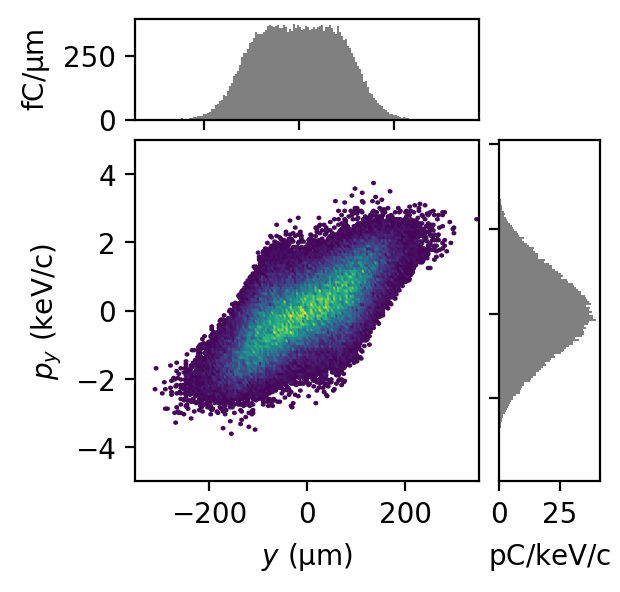

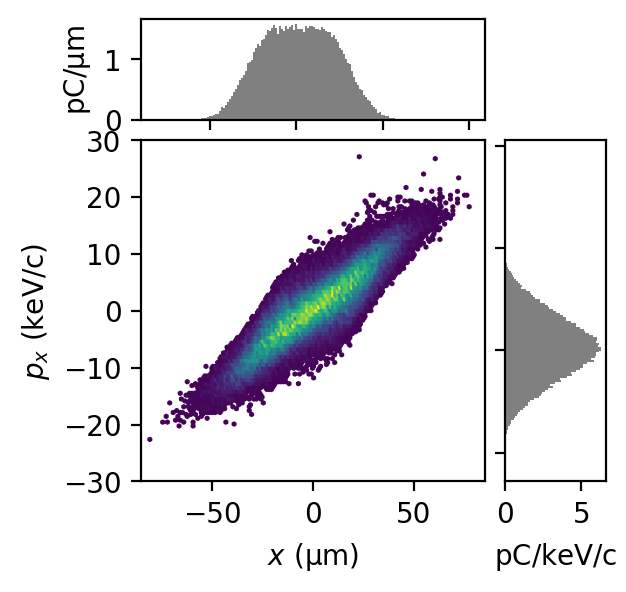

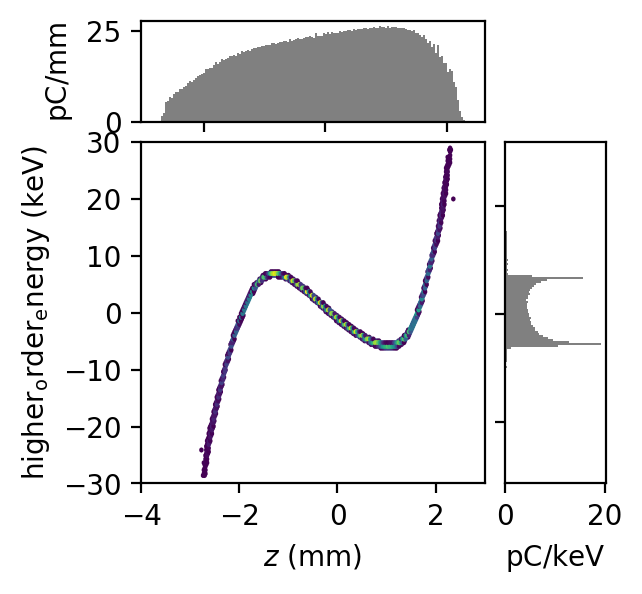

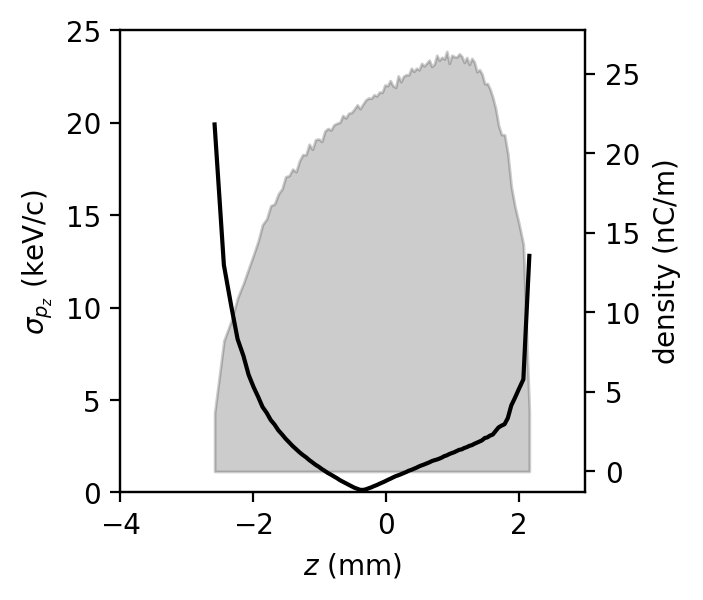

In [145]:
P=P_rw_SS
fig=P.plot('y', 'py', figsize=(3,3), return_figure=True)
ax = fig.axes[0]
ax.set_xlim(-350, 350)
ax.set_ylim(-5,5)
fig=P.plot('x', 'px', figsize=(3,3), return_figure=True)
ax = fig.axes[0]
ax.set_xlim(-85, 85)
ax.set_ylim(-30,30)
fig=P.plot('z', 'higher_order_energy', figsize=(3,3), return_figure=True)
ax = fig.axes[0]
ax.set_xlim(-4, 3)
ax.set_ylim(-30,30)
fig=P.slice_plot('sigma_pz', figsize=(3,3), return_figure=True)
ax = fig.axes[0]
ax.set_xlim(-4, 3)
ax.set_ylim(0,25)

In [123]:
Pscram.write('new_distribution.h5')

NameError: name 'Pscram' is not defined

# ParticleGroup class

x positions, in meters

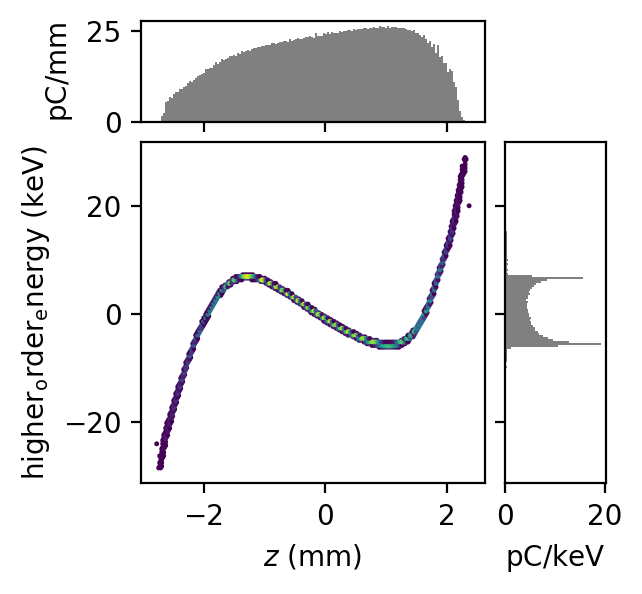

In [134]:
P_beg.higher_order_energy
fig=P.plot('z', 'higher_order_energy', figsize=(3,3), return_figure=True)

relativistic gamma, calculated on the fly

In [31]:
P.gamma

array([195.21695403, 194.73284534, 195.49386721, ..., 195.63217568,
       195.38322745, 195.59623497])

Both are allowed

In [32]:
len(P), P['n_particle']

(97646, 97646)

## Basic Statistics

Statistics on any of these. Note that these properly use the .weight array.

In [ ]:
P.avg('gamma'), P.std('p')

Covariance matrix of any list of keys

In [46]:
P.cov('x', 'px', 'y', 'kinetic_energy')

array([[ 4.50913330e-10,  1.17712622e-01,  3.63341327e-11,
        -5.41673551e-02],
       [ 1.17712622e-01,  3.87252912e+07,  6.08591439e-02,
        -2.01328520e+07],
       [ 3.63341327e-11,  6.08591439e-02,  7.60084923e-09,
        -4.14186796e-03],
       [-5.41673551e-02, -2.01328520e+07, -4.14186796e-03,
         1.42077972e+10]])

These can all be accessed with brackets. sigma_ and mean_ are also allowed

In [217]:
for P in [P_beg, P_0_0, P_0_1, P_1_0, P_1_1, P_rw_Cu, P_rw_SS]:
    print(P['norm_emit_x'], P['norm_emit_y'], P['sigma_energy'])

1.1950536746115056e-07 1.1920687981971076e-07 128281.66874923826
1.1730503393972254e-07 1.1790148256150676e-07 119195.85543951673
1.1975911058350192e-07 1.2313656122735735e-07 118126.53582391528
1.1708506370411183e-07 1.17815350862633e-07 117709.2778206845
1.19808024058234e-07 1.2313984305313296e-07 117429.44023620084
1.1729394858469832e-07 1.1790305705453999e-07 119168.46088474664
1.172562147843918e-07 1.1790113229456417e-07 119066.19663099042


Covariance has a special syntax, items separated by __

In [216]:
P = P_rw_Cu
P.drift_to_z()
stats=slice_statistics(P,keys=['average_current','charge', 'ptp_t','sigma_pz'], n_slice=40, slice_key='t')
maxix=np.argmax(stats['average_current'])
print(stats['average_current'][maxix])
print(stats['sigma_pz'][maxix]/stats['ptp_t'][maxix]*1e-15)
print(stats['ptp_t'][maxix])

7.811339165179476
16.988133597407693
3.1313452767571207e-13


n-dimensional histogram. This is a wrapper for `numpy.histogramdd`

In [ ]:
H, edges = P.histogramdd('t', 'delta_pz', bins=(5,10))
H.shape, edges

## Advanced statisics

Twiss and Dispersion can be calculated.

These are the projected Twiss parameters. 

TODO: normal mode twiss. 

In [34]:
P.twiss('x')

{'alpha_x': -1.5802183167022832,
 'beta_x': 0.5380388911420729,
 'gamma_x': 6.4996973007253604,
 'emit_x': 6.129274506561941e-10,
 'eta_x': 0.0003369604355411382,
 'etap_x': 0.0015212059426184606,
 'norm_emit_x': 1.1975896922887135e-07}

95% emittance calculation, x and y

In [35]:
P.twiss('xy', fraction=0.95)

{'alpha_x': -1.6880628008914453,
 'beta_x': 0.555315920351218,
 'gamma_x': 6.932190990164232,
 'emit_x': 5.210854461151457e-10,
 'eta_x': 0.0005583176121587433,
 'etap_x': 0.0022118220071686663,
 'norm_emit_x': 1.0181521089892378e-07,
 'alpha_y': -0.6666839436001062,
 'beta_y': 4.943208957307394,
 'gamma_y': 0.2922125067197246,
 'emit_y': 5.306489891525216e-10,
 'eta_y': -0.00024635850047105356,
 'etap_y': -8.882075952799513e-06,
 'norm_emit_y': 1.036851749380962e-07}

This makes new particles:

In [ ]:
P2 = P.twiss_match(beta=30, alpha=-3, plane = 'x')
P2.twiss('x')

## Units

Units can be retrieved from any computable quantitiy.
These are returned as a pmd_unit type.

In [49]:
P.units('x'), P.units('energy'), P.units('norm_emit_x'), P.units('cov_x__kinetic_energy'), P.units('norm_emit_4d')

(pmd_unit('m', 1, (1, 0, 0, 0, 0, 0, 0)),
 pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0)),
 pmd_unit('m', 1, (1, 0, 0, 0, 0, 0, 0)),
 pmd_unit('m*eV', 1.602176634e-19, (3, 1, -2, 0, 0, 0, 0)),
 pmd_unit('(m)^2', 1, (2, 0, 0, 0, 0, 0, 0)))

In [ ]:
P.units('mean_energy')

In [ ]:
str(P.units('cov_x__kinetic_energy'))

## z vs t

These particles are from Bmad, at the same z and different times

In [ ]:
P.std('z'), P.std('t')

Get the central time:

In [ ]:
t0 = P.avg('t')
t0

Drift all particles to this time. This operates in-place:

In [ ]:
P.drift_to_t(t0)

Now these are at different z, and the same t:

In [ ]:
P.std('z'), P.avg('t'), set(P.t)

## status, weight, id, copy

`status == 1` is alive, otherwise dead. Set the first ten particles to a different status.

`n_alive`, `n_dead` count these

In [ ]:
P.status[0:10] = 0
P.status, P.n_alive, P.n_dead

There is a `.where` convenience routine to make selections easier:

In [ ]:
P0 = P.where(P.status==0)
P1 = P.where(P.status==1)
len(P0), P0.charge, P1.charge

Copy is a deep copy:

In [ ]:
P2 = P1.copy()

Charge can also be set. This will re-scale the weight array:

In [ ]:
P2.charge = 9.8765e-12
P1.weight[0:2], P2.weight[0:2], P2.charge


Some codes provide ids for particles. If not, you can assign an id. 

In [ ]:
'id' in P2

This will assign an id if none exists. 

In [ ]:
P2.id, 'id' in P2

# Writing

In [ ]:
import h5py
import numpy as np

In [ ]:
newh5file = 'particles.h5'

with h5py.File(newh5file, 'w') as h5:
    P.write(h5)
    
with h5py.File(newh5file, 'r') as h5:
    P2 = ParticleGroup(h5)    

Check if all are the same:

In [ ]:
for key in ['x', 'px', 'y', 'py', 'z', 'pz', 't', 'status', 'weight', 'id']:
    same = np.all(P[key] == P2[key])
    print(key, same)

This does the same check:

In [ ]:
P2 == P

Write Astra-style particles

In [ ]:
P.write_astra('astra.dat')

In [ ]:
!head astra.dat

Optionally, a string can be given:

In [ ]:
P.write('particles.h5')

# Plot

Some plotting is included for convenience. See plot_examples.ipynb for better plotting. 

## 1D density plot

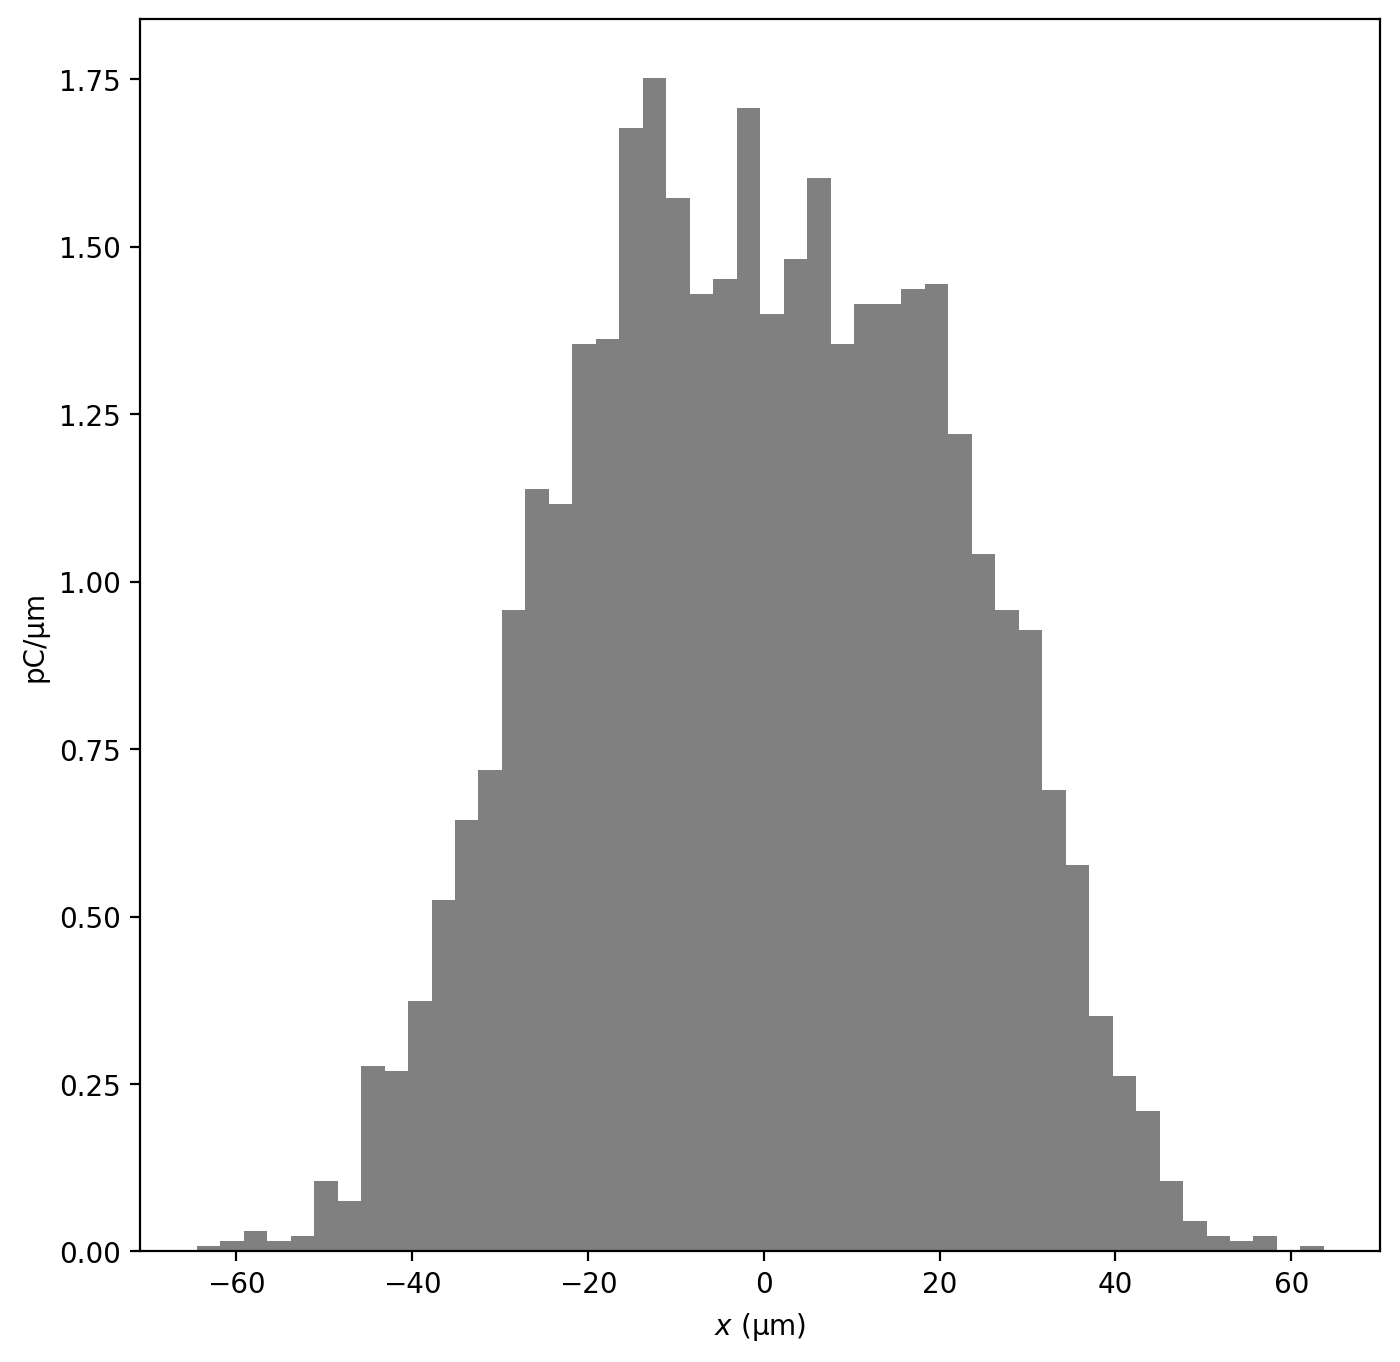

In [12]:
P_rw.plot('x')

## Slice statistic plot

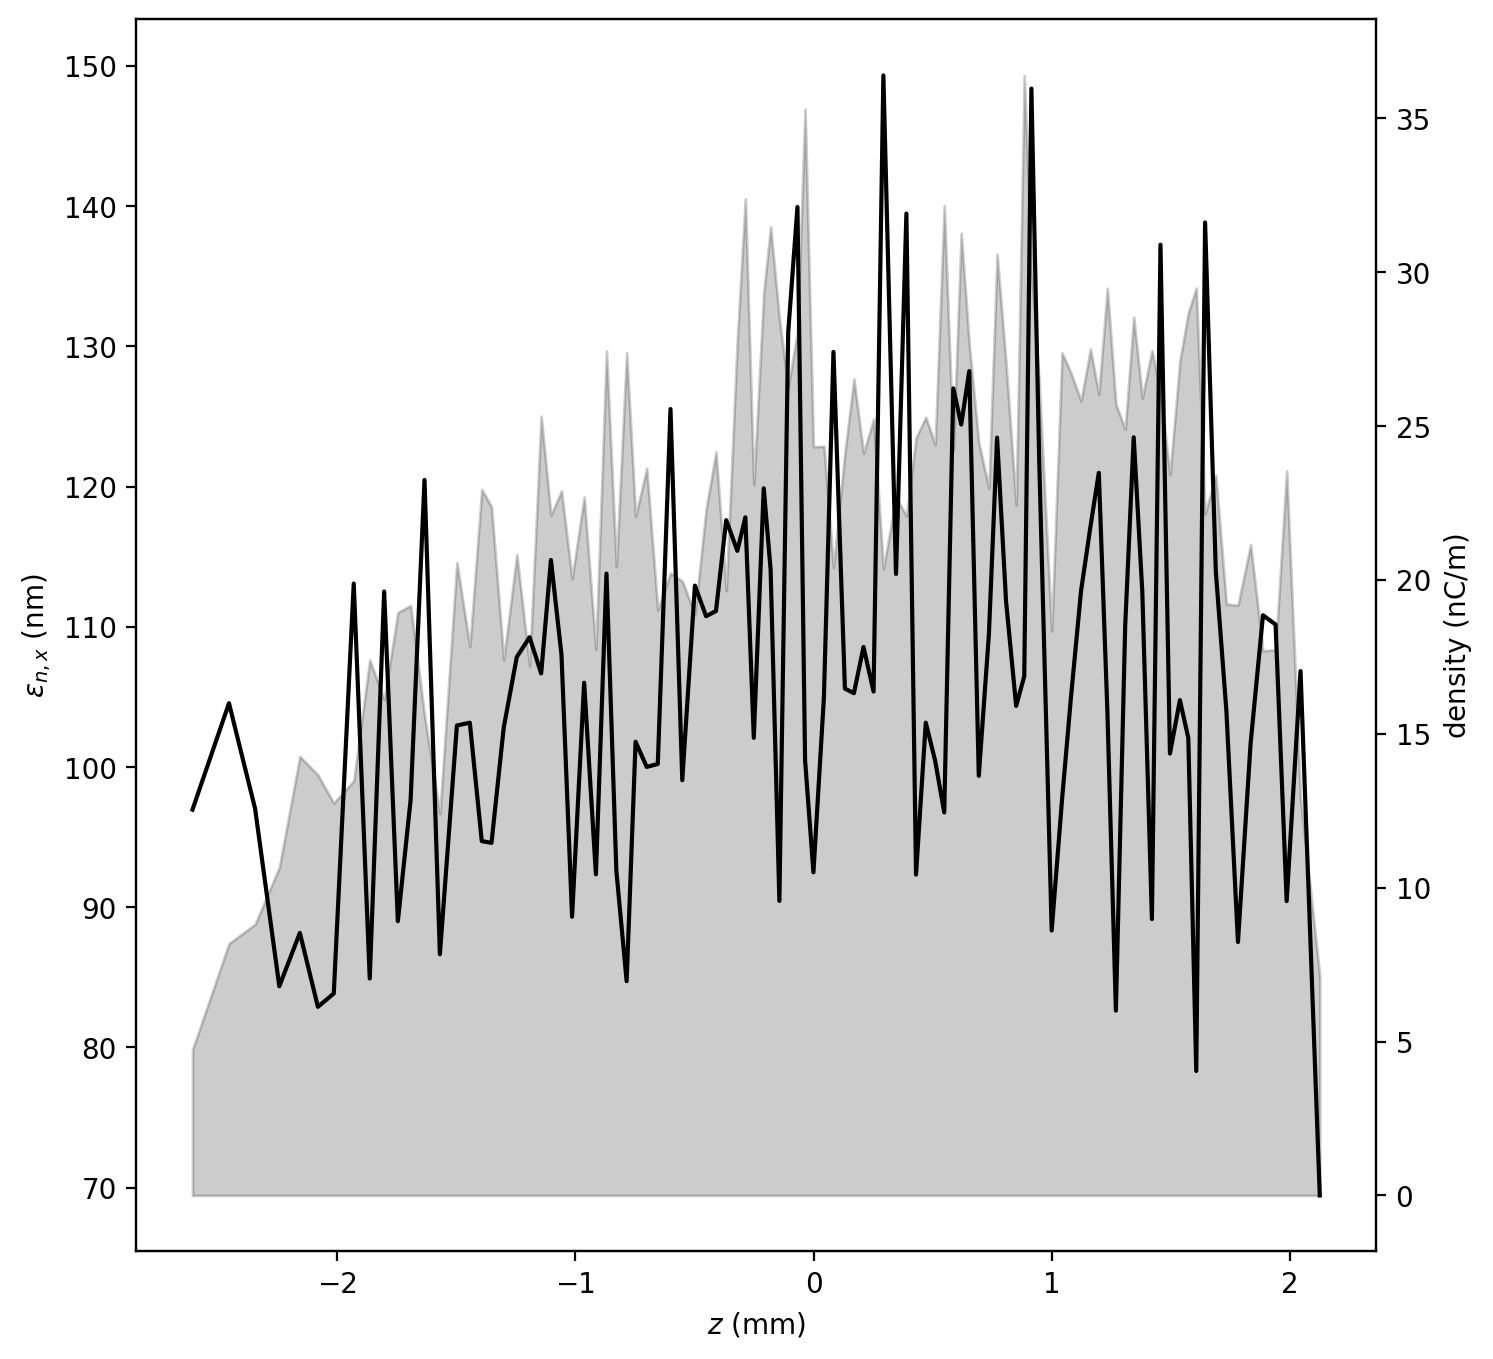

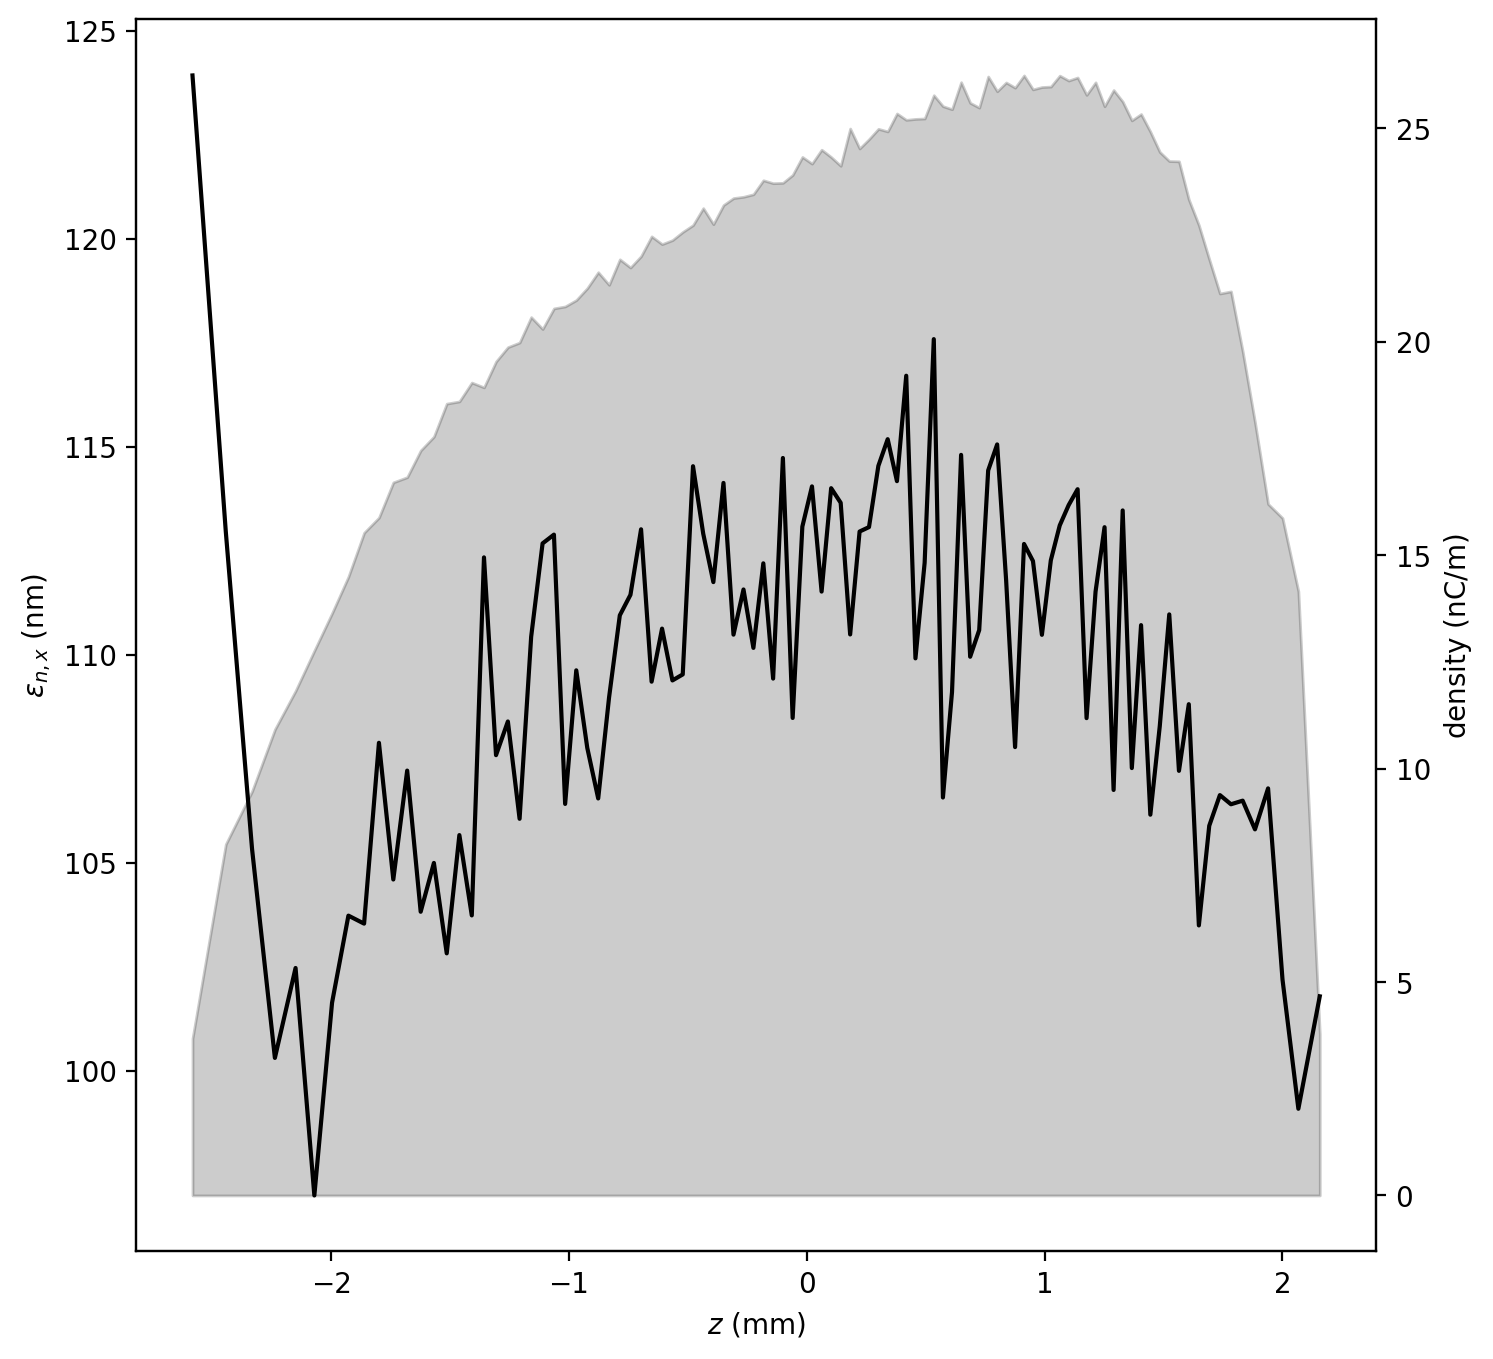

In [16]:

P_rw.slice_plot('norm_emit_x')
P_0_0.slice_plot('norm_emit_x')

## 2D density plot

In [ ]:
P.plot('x', 'px')

Optionally the figure object can be returned, and the plot further modified.

(-50.0, 50.0)

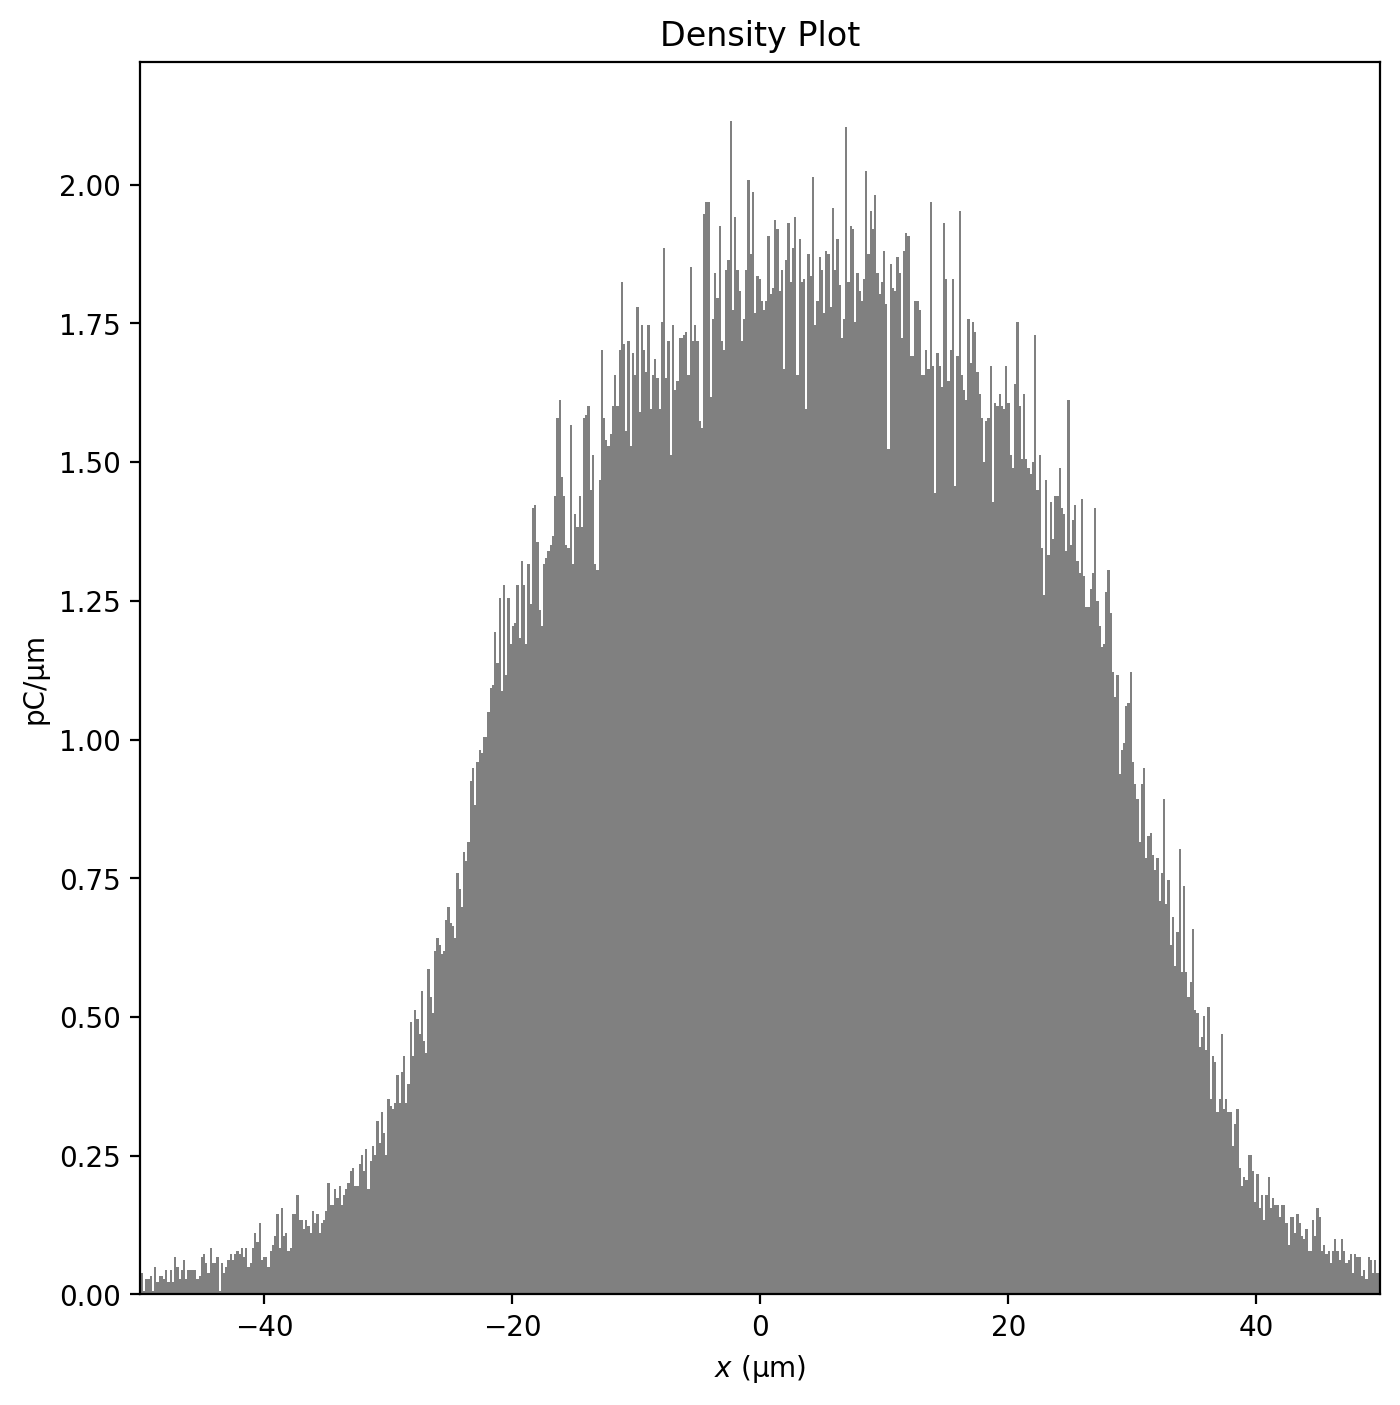

In [38]:
 fig = P.plot('x', return_figure=True)
ax = fig.axes[0]
ax.set_title('Density Plot')
ax.set_xlim(-50, 50)

## Manual plotting

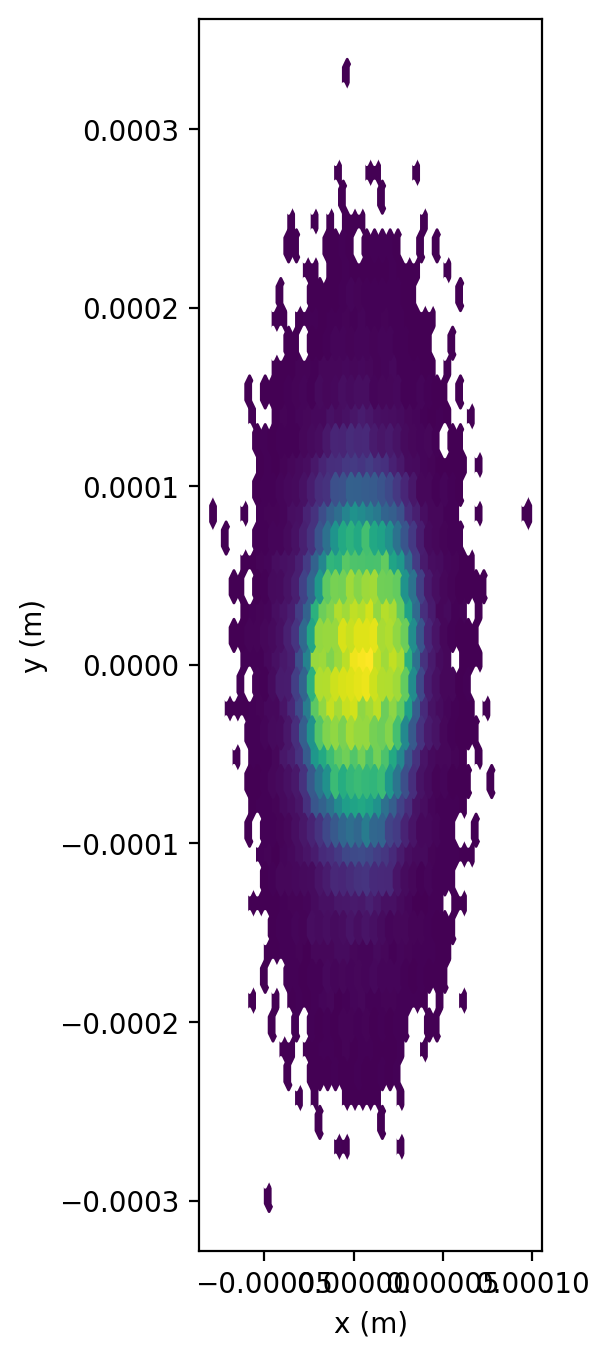

In [39]:
import copy

fig, ax = plt.subplots()
ax.set_aspect('equal')
xkey = 'x'
ykey = 'y'
datx = P[xkey]
daty = P[ykey]
ax.set_xlabel(f'{xkey} ({P.units(xkey)})')
ax.set_ylabel(f'{ykey} ({P.units(ykey)})')

cmap = copy.copy(plt.get_cmap('viridis'))
cmap.set_under('white')
ax.hexbin(datx, daty, gridsize=40, cmap=cmap, vmin=1e-15)

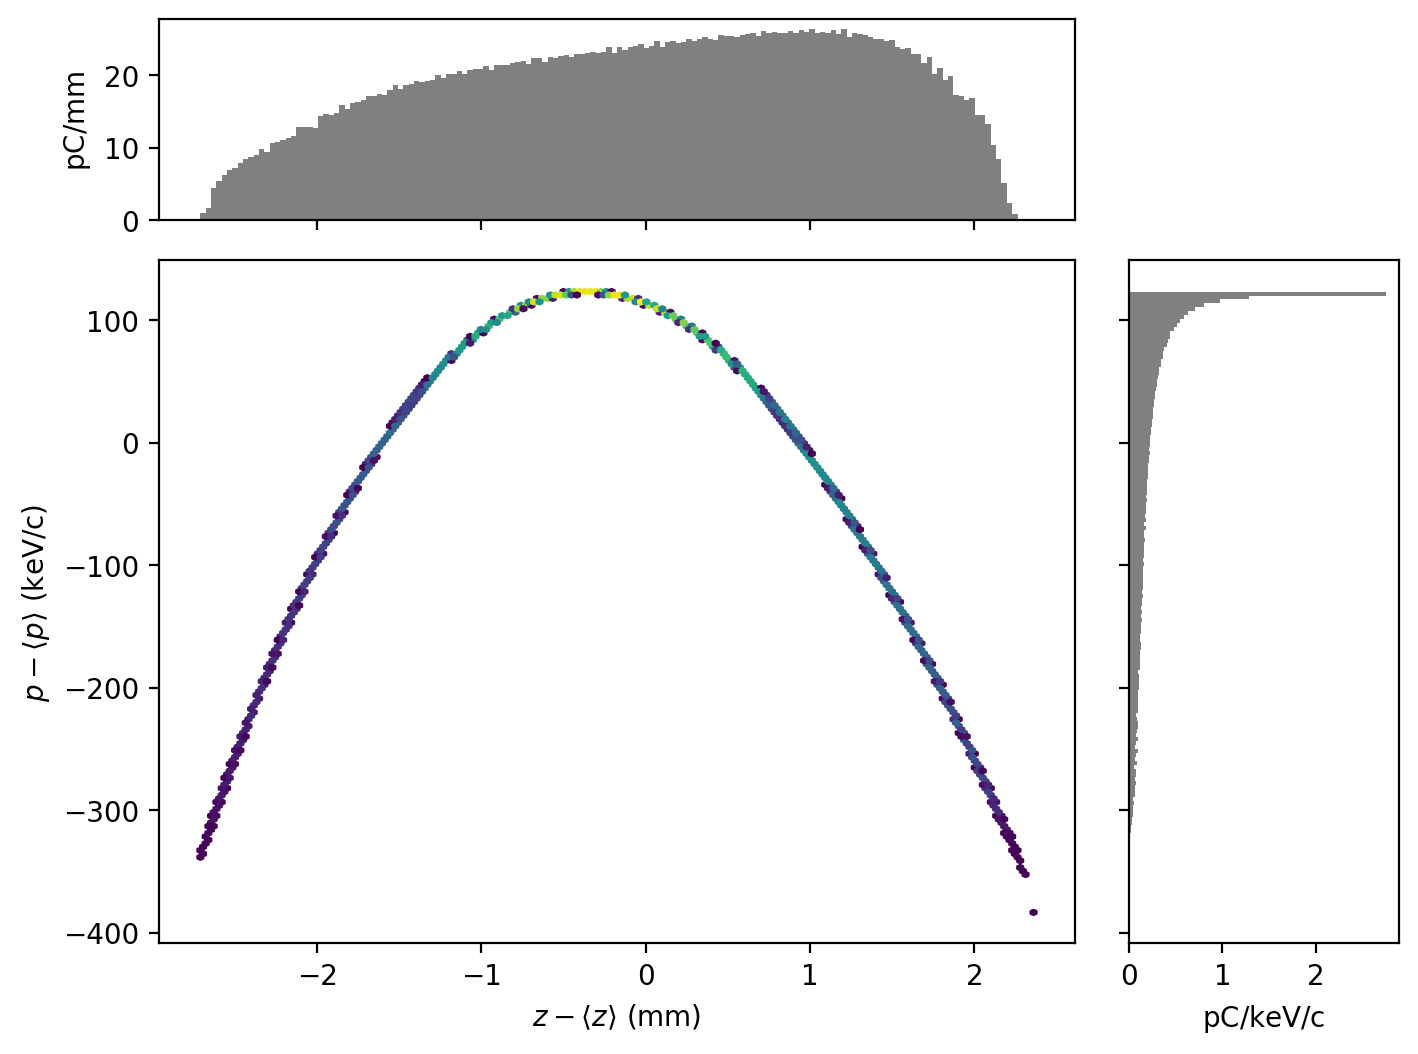

In [40]:
P.plot('delta_z', 'delta_p', figsize=(8,6))

## Manual binning and plotting

In [ ]:
H, edges = P.histogramdd('delta_z', 'delta_p', bins=(150, 150))
extent = [edges[0].min(),edges[0].max(),edges[1].min(),edges[1].max() ]

plt.imshow(H.T, origin='lower', extent = extent, aspect='auto', vmin=1e-15, cmap=cmap)

# Multiple ParticleGroup in an HDF5 file

This example has two particlegroups. This also shows how to examine the components, without loading the full data.


In [ ]:
from pmd_beamphysics import particle_paths
from pmd_beamphysics.readers import all_components, component_str

H5FILE = 'data/astra_particles.h5'
h5 = h5py.File(H5FILE, 'r')

Get the valid paths

In [ ]:
ppaths = particle_paths(h5)
ppaths

Search for all valid components in a single path

In [ ]:
ph5 = h5[ppaths[0]]
all_components(ph5 )

Get some info

In [ ]:
for component in all_components(ph5):
    info = component_str(ph5, component)
    print(info)

# Cleanup

In [ ]:
import os


os.remove('astra.dat')
os.remove(newh5file)
os.remove('elegant_particles.txt')